## NYC Trees - Data exploration and cleaning

### Import the necessary libraries

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### Load the dataset

In [25]:
trees = pd.read_csv('data_100000.csv')

### Display properties of the dataframe

In [29]:
# Header
trees.head(10)

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3,0,OnCurb,Alive,Fair,Acer rubrum,...,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.768749
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21,0,OnCurb,Alive,Fair,Quercus palustris,...,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.837379
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.891267
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.253136
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21,0,OnCurb,Alive,Good,Tilia americana,...,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.425999
5,08/30/2015,190422,106099,POINT (-73.98494997200308 40.770045625891846),11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,67,27,MN14,Lincoln Square,1014500,New York,40.770046,-73.984950,9.884187e+05,219825.522669
6,08/30/2015,190426,106099,POINT (-73.98533807200513 40.77020969000546),11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,67,27,MN14,Lincoln Square,1014500,New York,40.770210,-73.985338,9.883112e+05,219885.278455
7,09/07/2015,208649,103940,POINT (-73.98729652382876 40.7627238542921),9,0,OnCurb,Alive,Good,Tilia americana,...,75,27,MN15,Clinton,1012700,New York,40.762724,-73.987297,9.877691e+05,217157.856088
8,09/08/2015,209610,407443,POINT (-74.07625483097186 40.596579313729144),6,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,64,23,SI14,Grasmere-Arrochar-Ft. Wadsworth,5006400,New York,40.596579,-74.076255,9.630732e+05,156635.554233
9,08/31/2015,192755,207508,POINT (-73.96974394191379 40.58635724735751),21,0,OffsetFromCurb,Alive,Fair,Platanus x acerifolia,...,45,23,BK26,Gravesend,3037402,New York,40.586357,-73.969744,9.926537e+05,152903.630594


In [27]:
# Column names and types
trees.dtypes

created_at     object
tree_id         int64
block_id        int64
the_geom       object
tree_dbh        int64
stump_diam      int64
curb_loc       object
status         object
health         object
spc_latin      object
spc_common     object
steward        object
guards         object
sidewalk       object
user_type      object
problems       object
root_stone     object
root_grate     object
root_other     object
trnk_wire      object
trnk_light     object
trnk_other     object
brnch_ligh     object
brnch_shoe     object
brnch_othe     object
address        object
zipcode         int64
zip_city       object
cb_num          int64
borocode        int64
boroname       object
cncldist        int64
st_assem        int64
st_senate       int64
nta            object
nta_name       object
boro_ct         int64
state          object
latitude      float64
longitude     float64
x_sp          float64
y_sp          float64
dtype: object

In [31]:
# Number of rows and columns
trees.shape
# Total number of nan values
print(trees.isna().sum())

created_at       0
tree_id          0
block_id         0
the_geom         0
tree_dbh         0
stump_diam       0
curb_loc         0
status           0
health        4993
spc_latin     4992
spc_common    4992
steward       4992
guards        4992
sidewalk      4992
user_type        0
problems      4992
root_stone       0
root_grate       0
root_other       0
trnk_wire        0
trnk_light       0
trnk_other       0
brnch_ligh       0
brnch_shoe       0
brnch_othe       0
address          0
zipcode          0
zip_city         0
cb_num           0
borocode         0
boroname         0
cncldist         0
st_assem         0
st_senate        0
nta              0
nta_name         0
boro_ct          0
state            0
latitude         0
longitude        0
x_sp             0
y_sp             0
dtype: int64


In [32]:
# Are any rows duplicated?
trees.duplicated().any()

False

In [33]:
# Investigate the column created_at
print(trees.created_at.isna().any())
print(trees.created_at.dtype)
print(trees.created_at.agg({'max','min'}))

False
object
min    05/19/2015
max    10/13/2015
Name: created_at, dtype: object


In [34]:
# Convert created_at to datetime format
trees.created_at = pd.to_datetime(trees.created_at)
trees.head()

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,2015-08-27,180683,348711,POINT (-73.84421521958048 40.723091773924274),3,0,OnCurb,Alive,Fair,Acer rubrum,...,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.768749
1,2015-09-03,200540,315986,POINT (-73.81867945834878 40.79411066708779),21,0,OnCurb,Alive,Fair,Quercus palustris,...,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.837379
2,2015-09-05,204026,218365,POINT (-73.93660770459083 40.717580740099116),3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.891267
3,2015-09-05,204337,217969,POINT (-73.93445615919741 40.713537494833226),10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.253136
4,2015-08-30,189565,223043,POINT (-73.97597938483258 40.66677775537875),21,0,OnCurb,Alive,Good,Tilia americana,...,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.425999


In [35]:
# Column tree_id
print(trees.tree_id.isna().any())
print(trees.tree_id.dtype)  # int64 makes sense
print(trees.tree_id.agg({'max','min'}))
print(trees.tree_id.nunique())
# tree_id could be used as the index

False
int64
min         7
max    318496
Name: tree_id, dtype: int64
100000


In [37]:
# Set tree_id as the index
trees = trees.set_index('tree_id')

In [53]:
# Crete function for displaying some basic properties of a selected list of columns

def print_column_properties(data, col_names):
    if isinstance(col_names, str):
        col_names = [col_names]
    for col_name in col_names:
        print(col_name)
        print(data[col_name].isna().any())
        print(data[col_name].dtype)  # int64 makes sense
        if isinstance(col_name, (float,int)):
            print(data[col_name].agg({'max','min'}))
        print(data[col_name].unique())
        print(data[col_name].nunique())
        print("\n")

block_id
False
int64
[348711 315986 218365 ... 301826 231070 415766]
19472




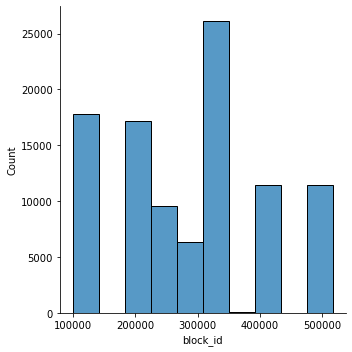

In [54]:
# Column block_id
print_column_properties(trees, 'block_id')
# Looks good

sns.displot(trees.block_id, bins=10)

tree_dbh
False
int64
[  3  21  10  11   9   6   8  13  22  30  12   2  14   4   5  33  19   7
  24  20  36  29  18  17  32  28  26  25  15  16  42  38  23  27   1  37
  39  35  31  34  41   0  44  43 425  50  51  40  72  45 122 169  46  47
  48 177  49  99 282  56  64  54  89  91 110  57  60  61  58  63  55 234
 120 255  52  71  76]
77




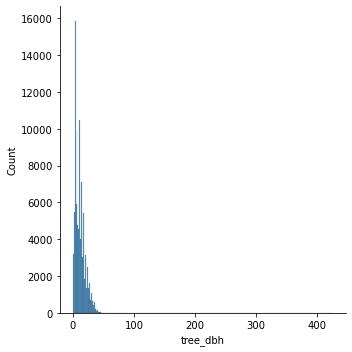

In [55]:
# Column tree_dbh
print_column_properties(trees, 'tree_dbh')
sns.displot(trees.tree_dbh, bins=300)

In [56]:
# tree_dbh distribution seems to have a very long tail
# This column represents tree diameter in inches
trees[trees.tree_dbh>70]

,created_at,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
tree_id,,,,,,,,,,,,,,,,,,,,,
168583,2015-08-23,226040,POINT (-73.94693592253036 40.67228657645615),425,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,...,43,20,BK61,Crown Heights North,3033900,New York,40.672287,-73.946936,9.989698e+05,184212.990548
139665,2015-08-12,409474,POINT (-74.09171228313842 40.57236260308215),72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,silver maple,...,64,24,SI45,New Dorp-Midland Beach,5011202,New York,40.572363,-74.091712,9.587713e+05,147816.919639
209349,2015-09-08,415127,POINT (-74.11595934608093 40.562379364379545),122,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,64,24,SI25,Oakwood-Oakwood Beach,5012806,New York,40.562379,-74.115959,9.520303e+05,144187.769089
215075,2015-09-11,515054,POINT (-73.84720553041983 40.89488599898038),169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,83,36,BX62,Woodlawn-Wakefield,2042800,New York,40.894886,-73.847206,1.026493e+06,265345.970342
214532,2015-09-10,323383,POINT (-73.76258496912143 40.76634288234309),177,0,OnCurb,Alive,Fair,Robinia pseudoacacia,black locust,...,26,11,QN46,Bayside-Bayside Hills,4111300,New York,40.766343,-73.762585,1.050015e+06,218565.253864
215564,2015-09-11,504455,POINT (-73.90767604628348 40.857363524657345),99,0,OnCurb,Alive,Poor,Juniperus virginiana,eastern redcedar,...,86,33,BX36,University Heights-Morris Heights,2025100,New York,40.857364,-73.907676,1.009789e+06,251651.660132
214534,2015-09-10,323383,POINT (-73.7625384873382 40.766146895629824),282,0,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,...,26,11,QN46,Bayside-Bayside Hills,4111300,New York,40.766147,-73.762538,1.050028e+06,218493.884584
184192,2015-08-29,505132,POINT (-73.89485969453924 40.84722163317852),89,0,OnCurb,Alive,Good,Robinia pseudoacacia,black locust,...,86,33,BX17,East Tremont,2037504,New York,40.847222,-73.894860,1.013339e+06,247960.580900
214530,2015-09-10,323383,POINT (-73.76263454381412 40.76654414156898),91,0,OnCurb,Alive,Good,Quercus shumardii,Schumard's oak,...,26,11,QN46,Bayside-Bayside Hills,4111300,New York,40.766544,-73.762635,1.050001e+06,218638.541775


stump_diam
False
int64
[  0  30  10  15  25  17   5  20   3  21   4   7   6  23  35  12  11   8
  14  16  19  22  18  27  24   9  36  40  13  37  44  41   1  38  48  34
  52   2  55  29  31  50  72  28 100  26  32  53  70 140  33  47  45  42
  39  90  46  43  58  54  74  64  49  57  77 118  51 109  67  80 134  78
  79  69  76]
75




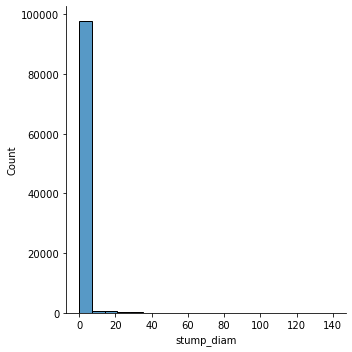

In [57]:
# Column tree_dbh
print_column_properties(trees, 'stump_diam')
sns.displot(trees.stump_diam, bins=20)

In [58]:
# stump_diam distribution seems to have a very long tail
# This column represents stump diameter in inches
trees[trees.stump_diam>70]

# I do not consider these values errors right now because trees can be that big

,created_at,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
tree_id,,,,,,,,,,,,,,,,,,,,,
166008,2015-08-22,226028,POINT (-73.94223725346203 40.67203570535525),0,72,OnCurb,Stump,NaN,NaN,NaN,...,43,25,BK61,Crown Heights North,3033900,New York,40.672036,-73.942237,1.000273e+06,184122.415598
206818,2015-09-06,311117,POINT (-73.83305752610536 40.74711662421229),0,100,OnCurb,Stump,NaN,NaN,NaN,...,25,16,QN62,Queensboro Hill,4080301,New York,40.747117,-73.833058,1.030507e+06,211515.458581
206819,2015-09-06,311117,POINT (-73.83303719501819 40.74724027320799),0,140,OnCurb,Stump,NaN,NaN,NaN,...,25,16,QN62,Queensboro Hill,4080301,New York,40.747240,-73.833037,1.030513e+06,211560.518530
228273,2015-09-15,207454,POINT (-73.96346200963461 40.58688339296886),0,90,OnCurb,Stump,NaN,NaN,NaN,...,45,23,BK19,Brighton Beach,3037000,New York,40.586883,-73.963462,9.943985e+05,153095.983884
237977,2015-09-19,312634,POINT (-73.79476776698 40.76611983837855),0,74,OnCurb,Stump,NaN,NaN,NaN,...,26,11,QN51,Murray Hill,4114100,New York,40.766120,-73.794768,1.041100e+06,218461.467654
260626,2015-09-26,111823,POINT (-73.93819923261113 40.853449495066414),0,77,OnCurb,Stump,NaN,NaN,NaN,...,71,31,MN35,Washington Heights North,1027300,New York,40.853450,-73.938199,1.001347e+06,250218.201385
253992,2015-09-24,209425,POINT (-73.928689369127 40.595881973182586),0,118,OnCurb,Stump,NaN,NaN,NaN,...,59,22,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,3062800,New York,40.595882,-73.928689,1.004054e+06,156380.338864
278733,2015-10-03,402373,POINT (-74.10553198063704 40.62875752358155),0,109,OnCurb,Stump,NaN,NaN,NaN,...,61,24,SI35,New Brighton-Silver Lake,5012100,New York,40.628758,-74.105532,9.549567e+05,168367.343433
278766,2015-10-03,402342,POINT (-74.10638613201404 40.62870862340102),0,77,OnCurb,Stump,NaN,NaN,NaN,...,61,24,SI35,New Brighton-Silver Lake,5012100,New York,40.628709,-74.106386,9.547196e+05,168349.814597


curb_loc
False
object
['OnCurb' 'OffsetFromCurb']
2




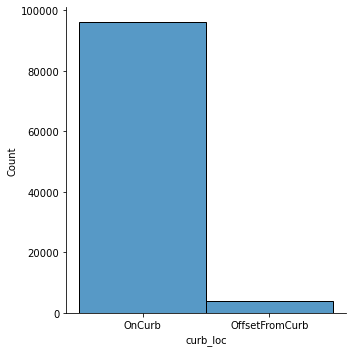

In [59]:
# Column curb_loc
print_column_properties(trees, 'curb_loc')
# Looks good
sns.displot(trees.curb_loc)

status
False
object
['Alive' 'Dead' 'Stump']
3




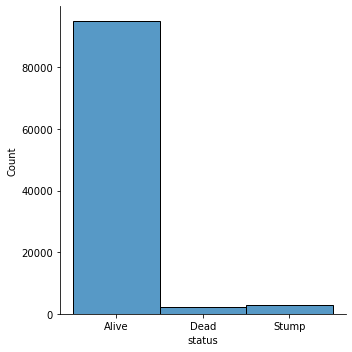

In [60]:
# Column status
print_column_properties(trees, 'status')
# Looks good
sns.displot(trees.status)

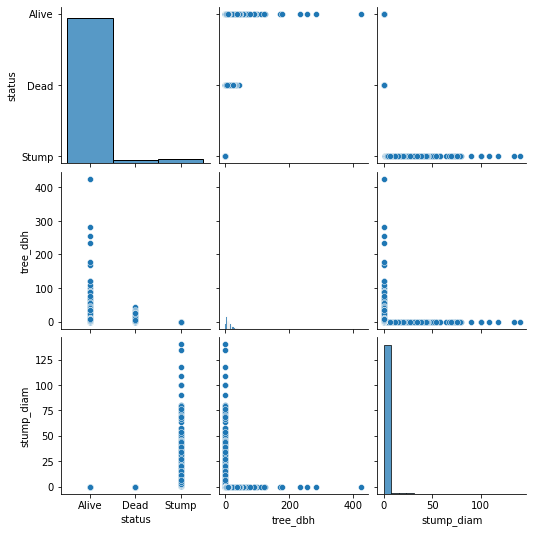

In [61]:
# tree_dbh and stump_diam should match status
# Stumps should always have tree_dbh = 0 and alive or dead trees should have stump_diam=0
sns.pairplot(trees, vars=['status','tree_dbh','stump_diam'])

# Looks good

In [62]:
# tree_dbh and stump_diam should match status
print(trees[trees.status=='Stump'].tree_dbh.describe())
print(trees[trees.status=='Alive'].stump_diam.describe())
# The values make sense

count    2831.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: tree_dbh, dtype: float64
count    95008.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: stump_diam, dtype: float64


health
True
object
['Fair' 'Good' 'Poor' nan]
3




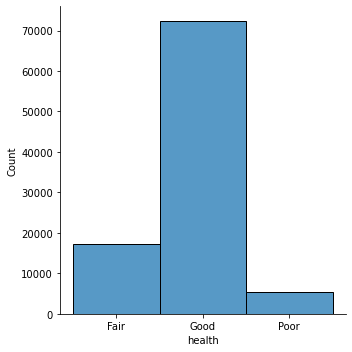

In [72]:
# Column health
print_column_properties(trees, 'health')

sns.displot(trees.health)
# This column has missing values

In [73]:
# Rows with NaN values for health
trees[trees.health.isna()]

,created_at,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
tree_id,,,,,,,,,,,,,,,,,,,,,
192569,2015-08-31,302968,POINT (-73.92155189169091 40.73804387948683),2,0,OnCurb,Dead,NaN,NaN,NaN,...,37,12,QN31,Hunters Point-Sunnyside-West Maspeth,4018501,New York,40.738044,-73.921552,1.005990e+06,208175.625037
179766,2015-08-27,230466,POINT (-73.95381354446748 40.637378972809216),0,30,OnCurb,Stump,NaN,NaN,NaN,...,42,21,BK42,Flatbush,3077000,New York,40.637379,-73.953814,9.970686e+05,171494.102928
180619,2015-08-27,348834,POINT (-73.83937577603841 40.72529976652313),0,10,OnCurb,Stump,NaN,NaN,NaN,...,27,15,QN17,Forest Hills,4075702,New York,40.725300,-73.839376,1.028771e+06,203563.629996
184295,2015-08-29,505610,POINT (-73.88785030235013 40.85787584478919),0,0,OnCurb,Dead,NaN,NaN,NaN,...,78,33,BX06,Belmont,2038700,New York,40.857876,-73.887850,1.015273e+06,251844.718801
208828,2015-09-08,107238,POINT (-73.96085724372357 40.76491371354804),0,15,OnCurb,Stump,NaN,NaN,NaN,...,76,28,MN31,Lenox Hill-Roosevelt Island,1011800,New York,40.764914,-73.960857,9.950930e+05,217957.861378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296790,2015-10-08,230356,POINT (-73.95772218530053 40.63346347587668),0,34,OnCurb,Stump,NaN,NaN,NaN,...,42,21,BK42,Flatbush,3076600,New York,40.633463,-73.957722,9.959845e+05,170067.034260
303810,2015-10-10,111012,POINT (-73.936685307355 40.84761153390736),0,15,OnCurb,Stump,NaN,NaN,NaN,...,72,31,MN36,Washington Heights South,1026300,New York,40.847612,-73.936685,1.001767e+06,248091.509772
297660,2015-10-08,230365,POINT (-73.95511460349579 40.63417256045958),0,12,OnCurb,Stump,NaN,NaN,NaN,...,42,21,BK42,Flatbush,3077200,New York,40.634173,-73.955115,9.967081e+05,170325.732889


In [74]:
# There are some columns that seem to have NaN values on the same rows, is that true?
cols_NaN = trees.isna().sum().index[trees.isna().sum()>0].to_list()
trees_cols_NaN = trees[cols_NaN]
print(trees_cols_NaN[trees_cols_NaN.isna()])
trees_cols_NaN.isna().sum()
# It seems all the null values are from these 7 columns, for a subset of rows
# We can delete these rows

        health spc_latin spc_common steward guards sidewalk problems
tree_id                                                             
180683     NaN       NaN        NaN     NaN    NaN      NaN      NaN
200540     NaN       NaN        NaN     NaN    NaN      NaN      NaN
204026     NaN       NaN        NaN     NaN    NaN      NaN      NaN
204337     NaN       NaN        NaN     NaN    NaN      NaN      NaN
189565     NaN       NaN        NaN     NaN    NaN      NaN      NaN
...        ...       ...        ...     ...    ...      ...      ...
299309     NaN       NaN        NaN     NaN    NaN      NaN      NaN
299310     NaN       NaN        NaN     NaN    NaN      NaN      NaN
307148     NaN       NaN        NaN     NaN    NaN      NaN      NaN
297724     NaN       NaN        NaN     NaN    NaN      NaN      NaN
277768     NaN       NaN        NaN     NaN    NaN      NaN      NaN

[100000 rows x 7 columns]


health        4993
spc_latin     4992
spc_common    4992
steward       4992
guards        4992
sidewalk      4992
problems      4992
dtype: int64

In [76]:
# Drop rows where the 7 columns above are NaN
trees.dropna(subset=cols_NaN, inplace=True)

In [79]:
# Are there any Nan values left?
trees.isna().any().sum()

0

In [80]:
# Column spc_latin
print_column_properties(trees, 'spc_latin')

# The type could be string
# Are there duplications here due to capitalization?
# Any leading or trailing spaces?

spc_latin
False
object
['Acer rubrum' 'Quercus palustris' 'Gleditsia triacanthos var. inermis'
 'Tilia americana' 'Platanus x acerifolia' 'Ginkgo biloba'
 'Quercus phellos' 'Acer pseudoplatanus' 'Acer ginnala' 'Acer campestre'
 'Ulmus americana' 'Fraxinus' 'Malus' 'Acer saccharinum' 'Corylus colurna'
 'Prunus serotina' 'Juniperus virginiana' 'Acer platanoides'
 'Liriodendron tulipifera' 'Quercus acutissima' 'Styphnolobium japonicum'
 'Quercus bicolor' 'Chionanthus retusus' 'Magnolia grandiflora'
 'Liquidambar styraciflua' 'Pyrus calleryana' 'Quercus coccinea'
 'Chamaecyparis thyoides' 'Quercus velutina' 'Zelkova serrata'
 'Quercus alba' 'Aesculus glabra' 'Quercus rubra' 'Tilia tomentosa'
 'Carya glabra' 'Cladrastis kentukea' 'Morus' 'Pseudotsuga menziesii'
 'Lagerstroemia' 'Sassafras albidum' 'Picea' 'Ulmus parvifolia'
 'Aesculus hippocastanum' 'Ilex' 'Tilia cordata' 'Pinus strobus'
 'Nyssa sylvatica' 'Syringa reticulata' 'Eucommia ulmoides'
 'Fraxinus pennsylvanica' 'Quercus robur' 'F

In [81]:
spc_unique = trees.spc_latin.unique()
spc_unique = spc_unique.astype('U')
print(len(spc_unique))
print(len(np.unique(np.char.lower(spc_unique))))
print(spc_unique)

spc_unique.
# Looks like there are no duplications due to spelling

125
125
['Acer rubrum' 'Quercus palustris' 'Gleditsia triacanthos var. inermis'
 'Tilia americana' 'Platanus x acerifolia' 'Ginkgo biloba'
 'Quercus phellos' 'Acer pseudoplatanus' 'Acer ginnala' 'Acer campestre'
 'Ulmus americana' 'Fraxinus' 'Malus' 'Acer saccharinum' 'Corylus colurna'
 'Prunus serotina' 'Juniperus virginiana' 'Acer platanoides'
 'Liriodendron tulipifera' 'Quercus acutissima' 'Styphnolobium japonicum'
 'Quercus bicolor' 'Chionanthus retusus' 'Magnolia grandiflora'
 'Liquidambar styraciflua' 'Pyrus calleryana' 'Quercus coccinea'
 'Chamaecyparis thyoides' 'Quercus velutina' 'Zelkova serrata'
 'Quercus alba' 'Aesculus glabra' 'Quercus rubra' 'Tilia tomentosa'
 'Carya glabra' 'Cladrastis kentukea' 'Morus' 'Pseudotsuga menziesii'
 'Lagerstroemia' 'Sassafras albidum' 'Picea' 'Ulmus parvifolia'
 'Aesculus hippocastanum' 'Ilex' 'Tilia cordata' 'Pinus strobus'
 'Nyssa sylvatica' 'Syringa reticulata' 'Eucommia ulmoides'
 'Fraxinus pennsylvanica' 'Quercus robur' 'Fraxinus america

In [68]:
# Column spc_latin
print(trees.spc_common.isna().any())
print(trees.spc_common.dtype)  # type should be string
print(trees.spc_common.nunique())
# print(trees.spc_common.unique())
# The type could be string
# Are there duplications here due to capitalization?
# Any leading or trailing spaces?

spc_unique = trees.spc_common.unique()
spc_unique = spc_unique.astype('U')
print(len(spc_unique))
print(len(np.unique(np.char.lower(spc_unique))))
print(spc_unique)
# Looks like there are no duplications due to spelling

True
object
125
126
126
['red maple' 'pin oak' 'honeylocust' 'American linden' 'London planetree'
 'ginkgo' 'willow oak' 'sycamore maple' 'Amur maple' 'hedge maple'
 'American elm' 'ash' 'crab apple' 'silver maple' 'Turkish hazelnut'
 'black cherry' 'eastern redcedar' 'Norway maple' 'tulip-poplar'
 'sawtooth oak' 'Sophora' 'swamp white oak' 'Chinese fringetree'
 'southern magnolia' 'sweetgum' 'Callery pear' 'scarlet oak'
 'Atlantic white cedar' 'black oak' 'Japanese zelkova' 'white oak'
 'Ohio buckeye' 'northern red oak' 'nan' 'silver linden' 'pignut hickory'
 'Kentucky yellowwood' 'mulberry' 'Douglas-fir' 'crepe myrtle' 'sassafras'
 'spruce' 'Chinese elm' 'horse chestnut' 'holly' 'littleleaf linden'
 'white pine' 'blackgum' 'Japanese tree lilac' 'hardy rubber tree'
 'green ash' 'English oak' 'white ash' 'golden raintree' "Schumard's oak"
 'Siberian elm' 'black walnut' 'weeping willow' 'katsura tree'
 'black locust' 'Persian ironwood' 'Cornelian cherry' 'Chinese chestnut'
 'southern re

In [69]:
# Column steward
print(trees.steward.isna().any())
print(trees.steward.dtype)  # type should be string
print(trees.steward.nunique())
print(trees.steward.unique())
# The nan values will be deleted later

True
object
4
['None' '1or2' '3or4' nan '4orMore']


In [70]:
# Column guards
print(trees.guards.isna().any())
print(trees.guards.dtype)  # type should be string
print(trees.guards.nunique())
print(trees.guards.unique())
# The nan values will be deleted later

True
object
4
['None' 'Helpful' 'Harmful' 'Unsure' nan]


In [71]:
# Column sidewalk
print(trees.sidewalk.isna().any())
print(trees.sidewalk.dtype)  # type should be string
print(trees.sidewalk.nunique())
print(trees.sidewalk.unique())
# The nan values will be deleted later

True
object
2
['NoDamage' 'Damage' nan]


In [36]:
# Column problems
print(trees.problems.isna().any())
print(trees.problems.dtype)  # type should be string
print(trees.problems.nunique())
print(trees.problems.unique())

problems_unique = trees.problems.unique()
problems_unique = problems_unique.astype('U')
print(len(problems_unique))
print(len(np.unique(np.char.lower(problems_unique))))
print(problems_unique)
# Looks like there are no duplications due to spelling
# The nan values will be deleted later
# I could separete problems into different columns (e.g., TrunkOther, WiresRope) with True or False values 

True
object
203
['None' 'Stones' 'MetalGrates' 'RootOther' 'Stones,BranchOther'
 'TrunkLights,BranchLights' 'RootOther,TrunkOther,BranchOther'
 'BranchOther' 'Stones,BranchLights' 'TrunkOther,BranchLights'
 'MetalGrates,TrunkOther' 'TrunkOther' 'Stones,WiresRope' 'BranchLights'
 nan 'WiresRope,BranchOther' 'RootOther,BranchOther'
 'Stones,WiresRope,BranchLights' 'WiresRope' 'WiresRope,BranchLights'
 'Stones,TrunkOther' 'WiresRope,TrunkLights,BranchLights'
 'Stones,RootOther' 'Stones,BranchLights,BranchOther'
 'Stones,RootOther,BranchLights' 'MetalGrates,BranchOther'
 'Stones,RootOther,TrunkOther' 'RootOther,TrunkOther'
 'Stones,TrunkOther,BranchLights,BranchOther'
 'Stones,TrunkOther,BranchOther' 'RootOther,BranchLights'
 'TrunkOther,BranchOther' 'RootOther,WiresRope,BranchLights'
 'Stones,TrunkOther,BranchLights' 'BranchLights,Sneakers'
 'Stones,RootOther,TrunkOther,BranchLights'
 'MetalGrates,TrunkOther,BranchOther' 'TrunkLights,BranchOther'
 'TrunkLights' 'Stones,RootOther,BranchOth

In [37]:
# Column for gps coordinates
print(trees.latitude.isna().any())
print(trees.latitude.dtype)
print(trees.latitude.nunique())
print(trees.latitude.unique())

print(trees.longitude.isna().any())
print(trees.longitude.dtype)
print(trees.longitude.nunique())
print(trees.longitude.unique())

False
float64
495899
[40.72309177 40.79411067 40.71758074 ... 40.69236382 40.6841084
 40.69034424]
False
float64
496610
[-73.84421522 -73.81867946 -73.9366077  ... -73.7988078  -73.81538073
 -73.79432283]


In [38]:
# Column for xy coordinates
print(trees.x_sp.isna().any())
print(trees.x_sp.dtype)
print(trees.x_sp.nunique())
print(trees.x_sp.unique())

print(trees.y_sp.isna().any())
print(trees.y_sp.dtype)
print(trees.y_sp.nunique())
print(trees.y_sp.unique())

False
float64
499359
[1027431.14821 1034455.70109 1001822.83131 ... 1040043.08099 1035453.54752
 1041288.54372]
False
float64
499353
[202756.768749 228644.837379 200716.891267 ... 191587.323568 188569.521861
 190854.424443]


In [84]:
# Too many columns to go through all, clean data now
trees.spc_latin = trees.spc_latin.astype(str)
trees.spc_common = trees.spc_common.astype(str)
trees.steward = trees.steward.astype(str)
trees.guards = trees.guards.astype(str)
trees.sidewalk = trees.sidewalk.to_string()

# Convert columns that are objects to strings
# flag_object_cols = trees.dtypes=='object'
# trees.loc[:,flag_object_cols.to_list()] = trees.loc[:,flag_object_cols.to_list()].astype('str')
# trees.infer_objects().dtypes

In [92]:
trees.dtypes

created_at    datetime64[ns]
tree_id                int64
block_id               int64
the_geom              object
tree_dbh               int64
stump_diam             int64
curb_loc              object
status                object
health                object
spc_latin             object
spc_common            object
steward               object
guards                object
sidewalk              object
user_type             object
problems              object
root_stone            object
root_grate            object
root_other            object
trnk_wire             object
trnk_light            object
trnk_other            object
brnch_ligh            object
brnch_shoe            object
brnch_othe            object
address               object
zipcode                int64
zip_city              object
cb_num                 int64
borocode               int64
boroname              object
cncldist               int64
st_assem               int64
st_senate              int64
nta           

In [40]:
# Drop rows with NaNs
trees.dropna(axis=0, how='any', inplace=True)

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,2015-08-27,180683,348711,POINT (-73.84421521958048 40.723091773924274),3,0,OnCurb,Alive,Fair,Acer rubrum,...,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.768749
1,2015-09-03,200540,315986,POINT (-73.81867945834878 40.79411066708779),21,0,OnCurb,Alive,Fair,Quercus palustris,...,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.837379
2,2015-09-05,204026,218365,POINT (-73.93660770459083 40.717580740099116),3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.891267
3,2015-09-05,204337,217969,POINT (-73.93445615919741 40.713537494833226),10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.253136
4,2015-08-30,189565,223043,POINT (-73.97597938483258 40.66677775537875),21,0,OnCurb,Alive,Good,Tilia americana,...,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.425999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2016-09-10,707205,323497,POINT (-73.78341146971617 40.772083384869454),19,0,OnCurb,Alive,Fair,Platanus x acerifolia,...,26,11,QN46,Bayside-Bayside Hills,4109300,New York,40.772083,-73.783411,1.044241e+06,220641.753320
499996,2016-09-05,697481,313531,POINT (-73.811563983618 40.77399802055024),4,0,OnCurb,Alive,Good,Quercus phellos,...,40,11,QN51,Murray Hill,4105900,New York,40.773998,-73.811564,1.036442e+06,221321.290347
499997,2016-09-21,719280,326793,POINT (-73.79880779855826 40.69236381531624),23,0,OnCurb,Alive,Good,Platanus x acerifolia,...,32,10,QN01,South Jamaica,4019600,New York,40.692364,-73.798808,1.040043e+06,191587.323568
499998,2016-09-21,719148,319187,POINT (-73.81538073393392 40.68410840397659),4,0,OnCurb,Alive,Good,Pyrus calleryana,...,31,10,QN55,South Ozone Park,4017000,New York,40.684108,-73.815381,1.035454e+06,188569.521861


In [93]:
trees.isna().sum()
# No null values

created_at    0
tree_id       0
block_id      0
the_geom      0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
spc_common    0
steward       0
guards        0
sidewalk      0
user_type     0
problems      0
root_stone    0
root_grate    0
root_other    0
trnk_wire     0
trnk_light    0
trnk_other    0
brnch_ligh    0
brnch_shoe    0
brnch_othe    0
address       0
zipcode       0
zip_city      0
cb_num        0
borocode      0
boroname      0
cncldist      0
st_assem      0
st_senate     0
nta           0
nta_name      0
boro_ct       0
state         0
latitude      0
longitude     0
x_sp          0
y_sp          0
dtype: int64

In [ ]:
trees_cleaned = trees.duplicated(keep='first')


In [44]:
# Plot the a scatter plot of the trees where
# the x and y axes are latitude and longitude
# points are colored by the health of tree
# marker size indicates tree or stump diameter (depending on health of the tree)
scale = data.tree_dbh + data.stump_diam
sns.lmplot(data=trees, x='latitude', y='longitude')

NameError: name 'data' is not defined

In [ ]:
# Save dataset for later
trees.to_csv('data_500000_cleaned.csv')